# Price History Plotting

In [7]:
# installs
%pip install requests
%pip install matplotlib

import datetime
import requests
import matplotlib.pyplot as plt
import helpers.webservice as webservice


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 12.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 19.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 18.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 14.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------------- -------------------------- 4.2/12.6 MB 21.4 MB/s eta 0:00:01
   -------------------------------- ------- 10.2/12.6 MB 24.5 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 23.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 16.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
############################################################
#
# print_price_chart
#
def print_price_chart(baseurl, cardname, numdays):
  api = '/cardprice/'
  
  prices = []
  days = []
  today = datetime.datetime.today()
  if datetime.datetime.now().hour <= 9:
    today -= datetime.timedelta(days=1)
  for i in range(int(numdays)):
    url = baseurl + api + cardname.replace(' ', '+')
    date = (today - datetime.timedelta(days=i)).strftime('%Y-%m-%d')
    days.append(date)
    url += "?date=" + date
    print(url)
    res = webservice.web_service_get(url)

    if res.status == 200:
      pass
    else:
      print("**ERROR: failed with status code:", res.status)
      print("url: " + url)
      if res.status == 500:
        body = res.json()
        print("Error message:", body)
      return

    # if it's successful, we have a price
    body = res.json()

    prices.append(body["price"])
    print(body["price"])

  # we should go in chronological order
  days.reverse()
  prices.reverse()

  plt.plot(days, prices, marker='x')
  plt.xlabel("Date")
  plt.ylabel("Price (in USD)")
  plt.xticks(rotation=90) # from https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels
  plt.title(f"Price of {cardname} Over {numdays} Days")
  plt.show()

https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod//cardprice/Bloodstained+Mire?date=2025-03-23
10.08
https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod//cardprice/Bloodstained+Mire?date=2025-03-22
10.41
https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod//cardprice/Bloodstained+Mire?date=2025-03-21
10.84
https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod//cardprice/Bloodstained+Mire?date=2025-03-20
11.09
https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod//cardprice/Bloodstained+Mire?date=2025-03-19
10.93
https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod//cardprice/Bloodstained+Mire?date=2025-03-18
11.14
https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod//cardprice/Bloodstained+Mire?date=2025-03-17
11.2
https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod//cardprice/Bloodstained+Mire?date=2025-03-16
11.41
https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod//cardprice/Bloodstained+Mire?date=2025-03-15
11.41
ht

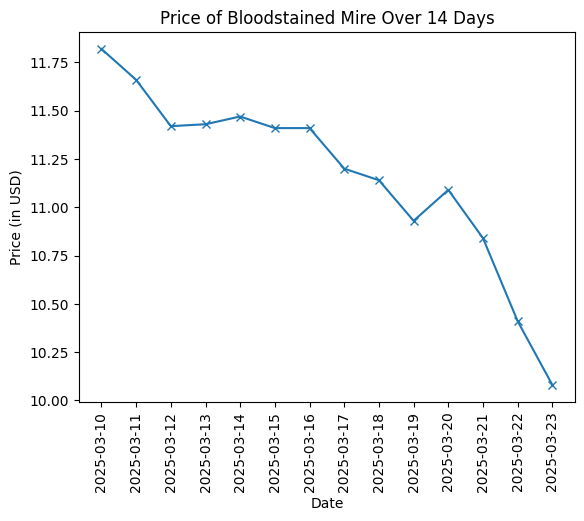

In [21]:
print_price_chart("https://5mvvd2iv46.execute-api.us-east-2.amazonaws.com/prod/", "Bloodstained Mire", 14)